### Jupyter notebook for practice quiz for lesson 2.4.2
This Jupyter notebook implements a constant-power/constant-voltage charging scenario, as taught in this lesson

In [14]:
% add the toolbox code to Octave's path
addpath readonly
load readonly/E1model.mat; 

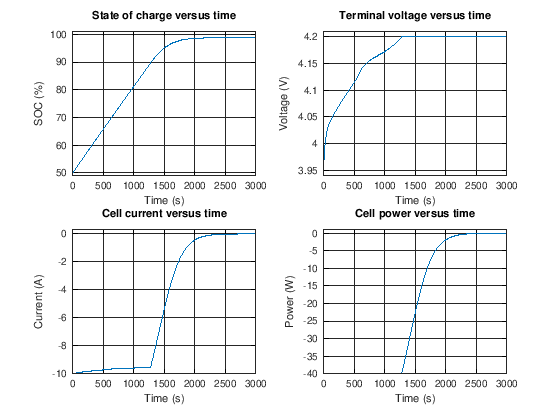

In [15]:
% Get ESC model parameters
maxtime = 3001; T = 25; % Simulation run time, temperature
q  = getParamESC('QParam',T,model); 
rc = exp(-1./abs(getParamESC('RCParam',T,model)));
r  = (getParamESC('RParam',T,model));
m  = getParamESC('MParam',T,model);
g  = getParamESC('GParam',T,model);
r0 = getParamESC('R0Param',T,model);
maxV = 4.2; % maximum cell voltage of 4.15 V

storez = zeros([maxtime 1]);  % create storage for SOC
storev = zeros([maxtime 1]);  % create storage for voltage
storei = zeros([maxtime 1]);  % create storage for current
storep = zeros([maxtime 1]);  % create storage for power
z  = 0.5; irc = 0; h  = -1; % initialize to 50% SOC, resting

% Simulate CP/CV
z  = 0.5; irc = 0; h  = -1; % initialize to 50% SOC, resting
CP = 40; % constant power limit of 35 W in CP/CV charge

for k = 1:maxtime,
  v = OCVfromSOCtemp(z,T,model) + m*h - r*irc; % fixed voltage

  % try CP first
  ik = (v - sqrt(v^2 - 4*r0*(-CP)))/(2*r0);
  if v - ik*r0 > maxV, % too much!
    ik = (v - maxV)/r0; % do CV instead
  end

  z = z - (1/3600)*ik/q;  % Update cell SOC
  irc = rc*irc + (1-rc)*ik; % Update resistor currents
  fac = exp(-abs(g.*ik)./(3600*q));
  h = fac.*h + (fac-1).*sign(ik); % Update hysteresis voltages
  storez(k) = z; % Store SOC for later plotting
  storev(k) = v - ik*r0;
  storei(k) = ik; % store current for later plotting
  storep(k) = ik*storev(k);
end % for k

time = 0:maxtime -1;
subplot(2,2,1); plot(time,100*storez); 
title('State of charge versus time');
xlabel('Time (s)'); ylabel('SOC (%)'); ylim([49 101]); grid on

subplot(2,2,2); plot(time,storev); 
title('Terminal voltage versus time');
xlabel('Time (s)'); ylabel('Voltage (V)');
ylim([3.94 4.21]); grid on

subplot(2,2,3); plot(time,storei); 
title('Cell current versus time');
xlabel('Time (s)'); ylabel('Current (A)');
ylim([-10 0.3]); grid on

subplot(2,2,4); plot(time,storep);
title('Cell power versus time');
xlabel('Time (s)'); ylabel('Power (W)');
ylim([-40 1]); grid on

In [16]:
% Find the point in time where the charging profile transfers from CC to CV
time(find(storev == 4.2,1))


ans =  1277


In [19]:
min(storei)

ans = -10.127
